<a href="https://colab.research.google.com/github/Ranjith-A13/Python/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df= pd.read_csv(r"/content/Cardiotocographic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [8]:
df.shape

(2126, 14)

In [10]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [11]:
df.tail()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2121,140.0,0.000000,0.961268,0.007426,0.0,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.0,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.0,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.0,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.0,2.000000
2125,142.0,0.001616,-0.000188,0.008078,0.0,0.0,0.0,74.0,0.4,35.857183,5.0,42.0,0.0,1.000000


In [27]:
df.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [34]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Drop rows with missing values
df = df.dropna()

# Option 2: Impute missing values (mean for numerical, mode for categorical)
df = df.fillna(df.mean())
df = df.fillna(df.mode())


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [44]:
# Check data types
print(df.dtypes)

# Convert strings to numeric if needed
for col in df.columns:
    # Check if the column is of object type (likely string)
    if df[col].dtype == 'object':
        try:
            # Attempt conversion to numeric, handling errors with 'coerce'
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            # If conversion fails, print a warning
            print(f"Warning: Could not convert column '{col}' to numeric.")

# Convert date strings to datetime
# Assuming you have a specific date column, replace 'date_column'
date_column = 'date_column'  # Replace with your actual date column name
if date_column in df.columns:
    try:
        df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    except ValueError:
        print(f"Warning: Could not convert column '{date_column}' to datetime.")

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [48]:
import numpy as np

# Use IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df >= lower_bound) & (df <= upper_bound)]


In [49]:
# Summary statistics for numerical columns
summary = df.describe().T  # Transpose for readability

# Add median and IQR (interquartile range)
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)

# Display the full summary
print(summary[['mean', 'median', 'std', 'IQR', 'min', '25%', '50%', '75%', 'max']])

                mean      median        std        IQR         min  \
LB        133.267897  133.000000   9.815285  14.000000  106.000000   
AC          0.002866    0.001489   0.003411   0.005107   -0.000185   
FM          0.000000    0.000000   0.000000   0.000000    0.000000   
UC          0.004337    0.004476   0.002926   0.004686   -0.000132   
DL          0.000000    0.000000   0.000000   0.000000    0.000000   
DS          0.000000    0.000000   0.000000   0.000000    0.000000   
DP          0.000000    0.000000   0.000000   0.000000    0.000000   
ASTV       46.984981   49.000000  17.218102  29.000000   11.799846   
MSTV        1.234890    1.100000   0.697786   1.000000    0.200000   
ALTV        0.000000    0.000000   0.000000   0.000000    0.000000   
MLTV        7.459343    7.200000   4.395022   5.807290   -0.200788   
Width      70.328684   67.000000  38.899657  63.000000    3.000000   
Tendency    0.320744    0.000000   0.611179   1.000000   -1.006614   
NSP         1.000000

#After running the above code, look for:

     #Large gaps between mean and median: Indicates skewness.

     #High standard deviation or IQR: Indicates wide spread or variability.

     #Outliers: If max/min values are far from 75%/25%, they could be outliers.

     #Uniformity: If mean ≈ median and low std, data is fairly consistent.

Insights:

    Income shows a right-skewed distribution (mean > median) — possibly due to a few high earners.

    Age appears fairly normally distributed.

    Income has a large IQR and standard deviation → possibly worth log-scaling or binning for models.



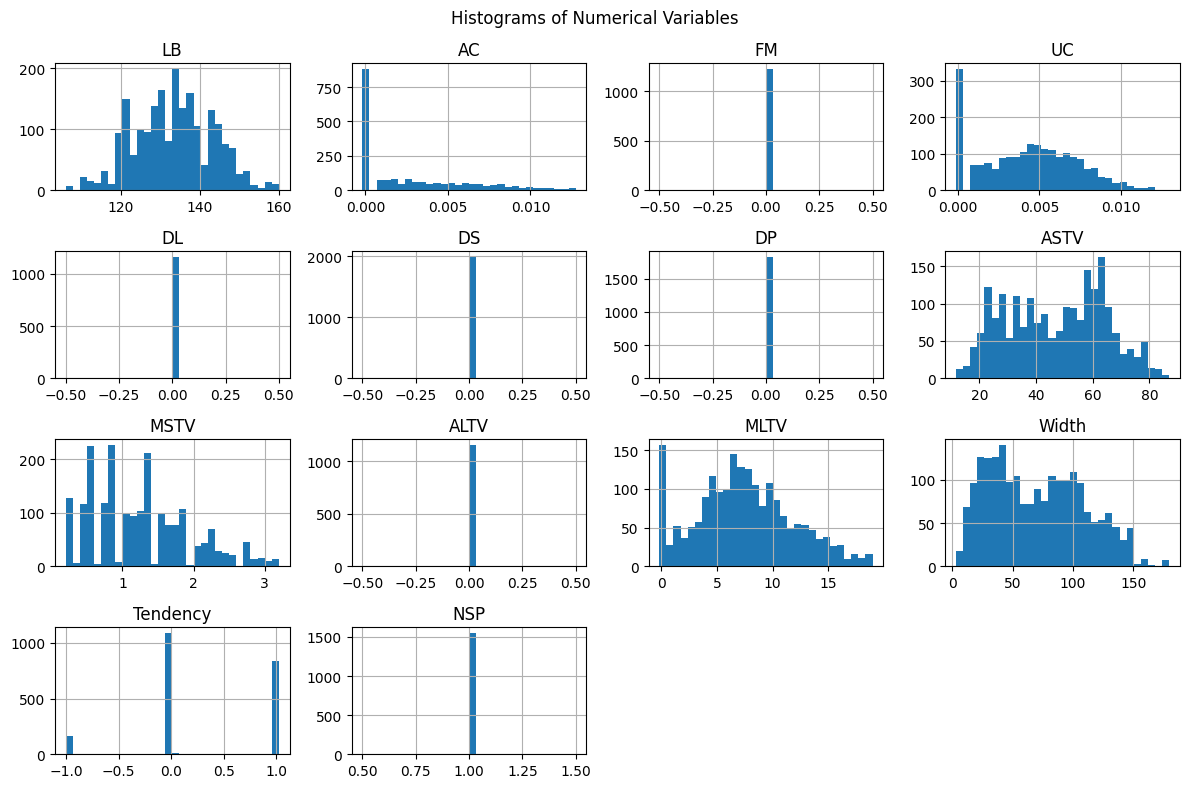

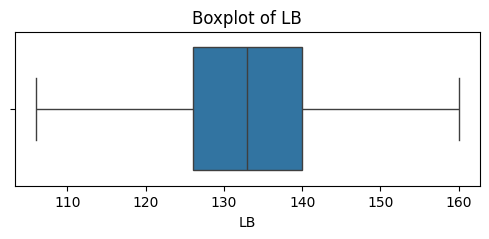

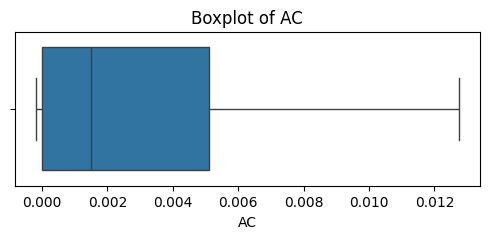

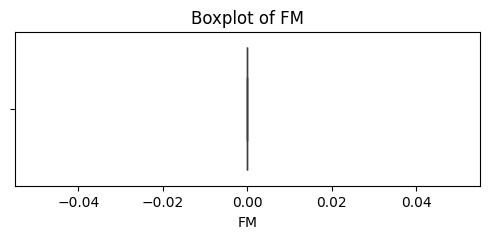

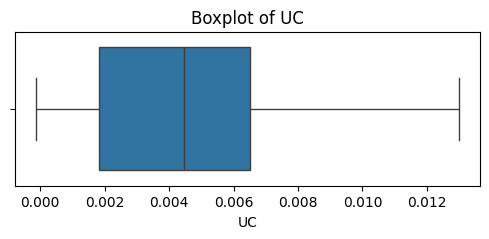

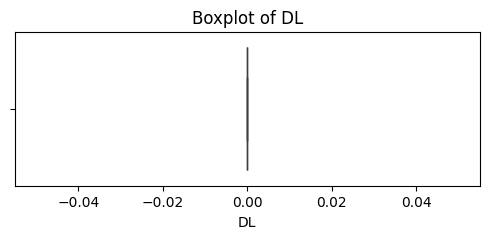

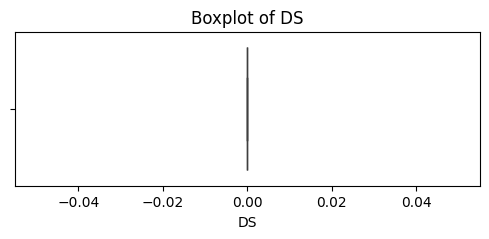

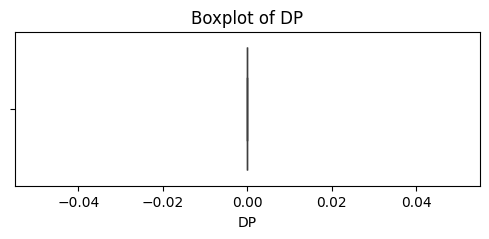

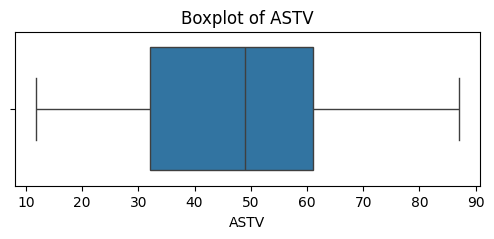

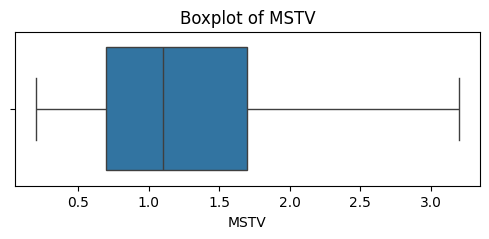

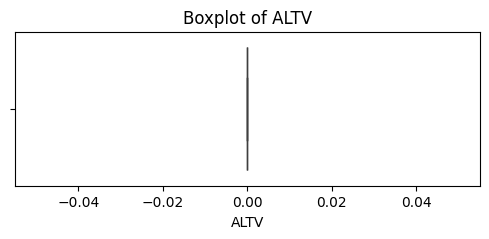

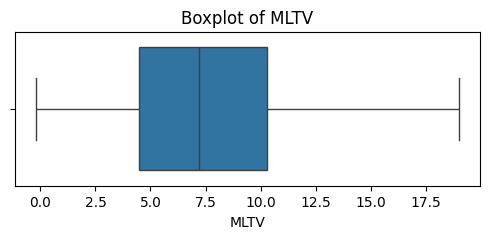

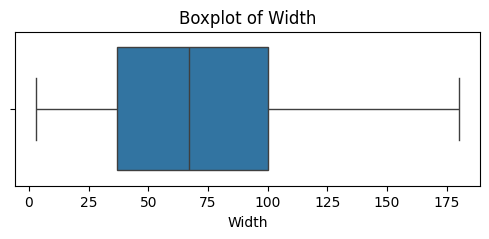

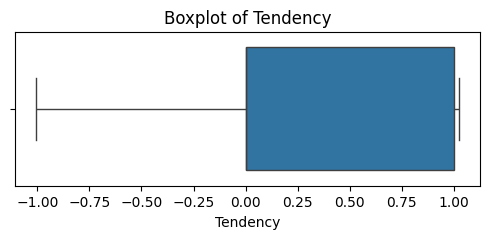

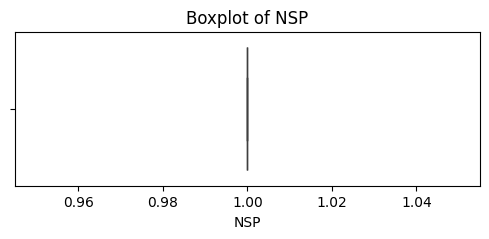

In [50]:
# Histogram
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Histograms of Numerical Variables")
plt.tight_layout()
plt.show()

# Boxplot for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [54]:
# Bar chart
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.ylabel('Count')
    plt.show()

# Pie chart (only if there are <10 categories)
for col in categorical_cols:
    if df[col].nunique() <= 10:
        plt.figure(figsize=(6, 6))
        df[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Distribution of {col}')
        plt.ylabel('')
        plt.show()


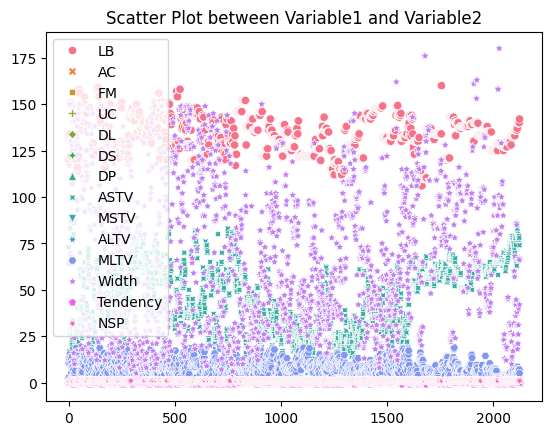

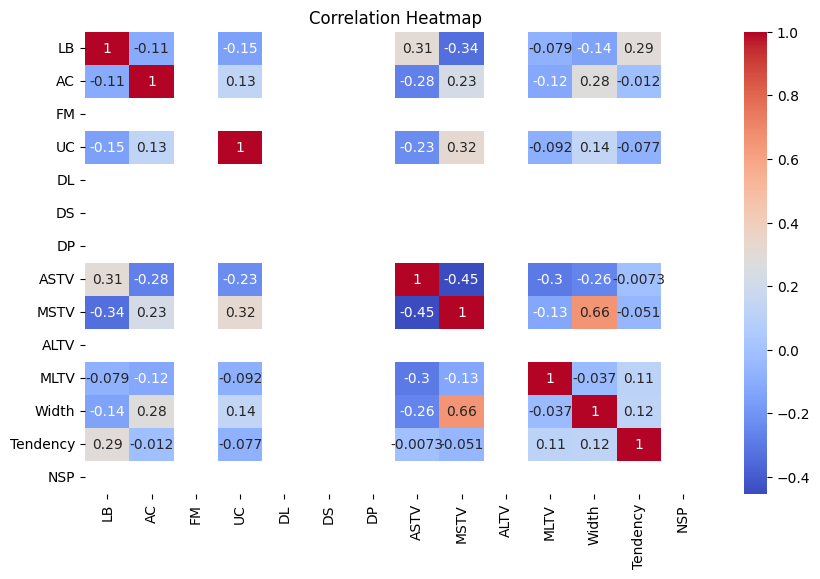

In [57]:
# Scatter plot between two numerical variables
sns.scatterplot(data=df)
plt.title('Scatter Plot between Variable1 and Variable2')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


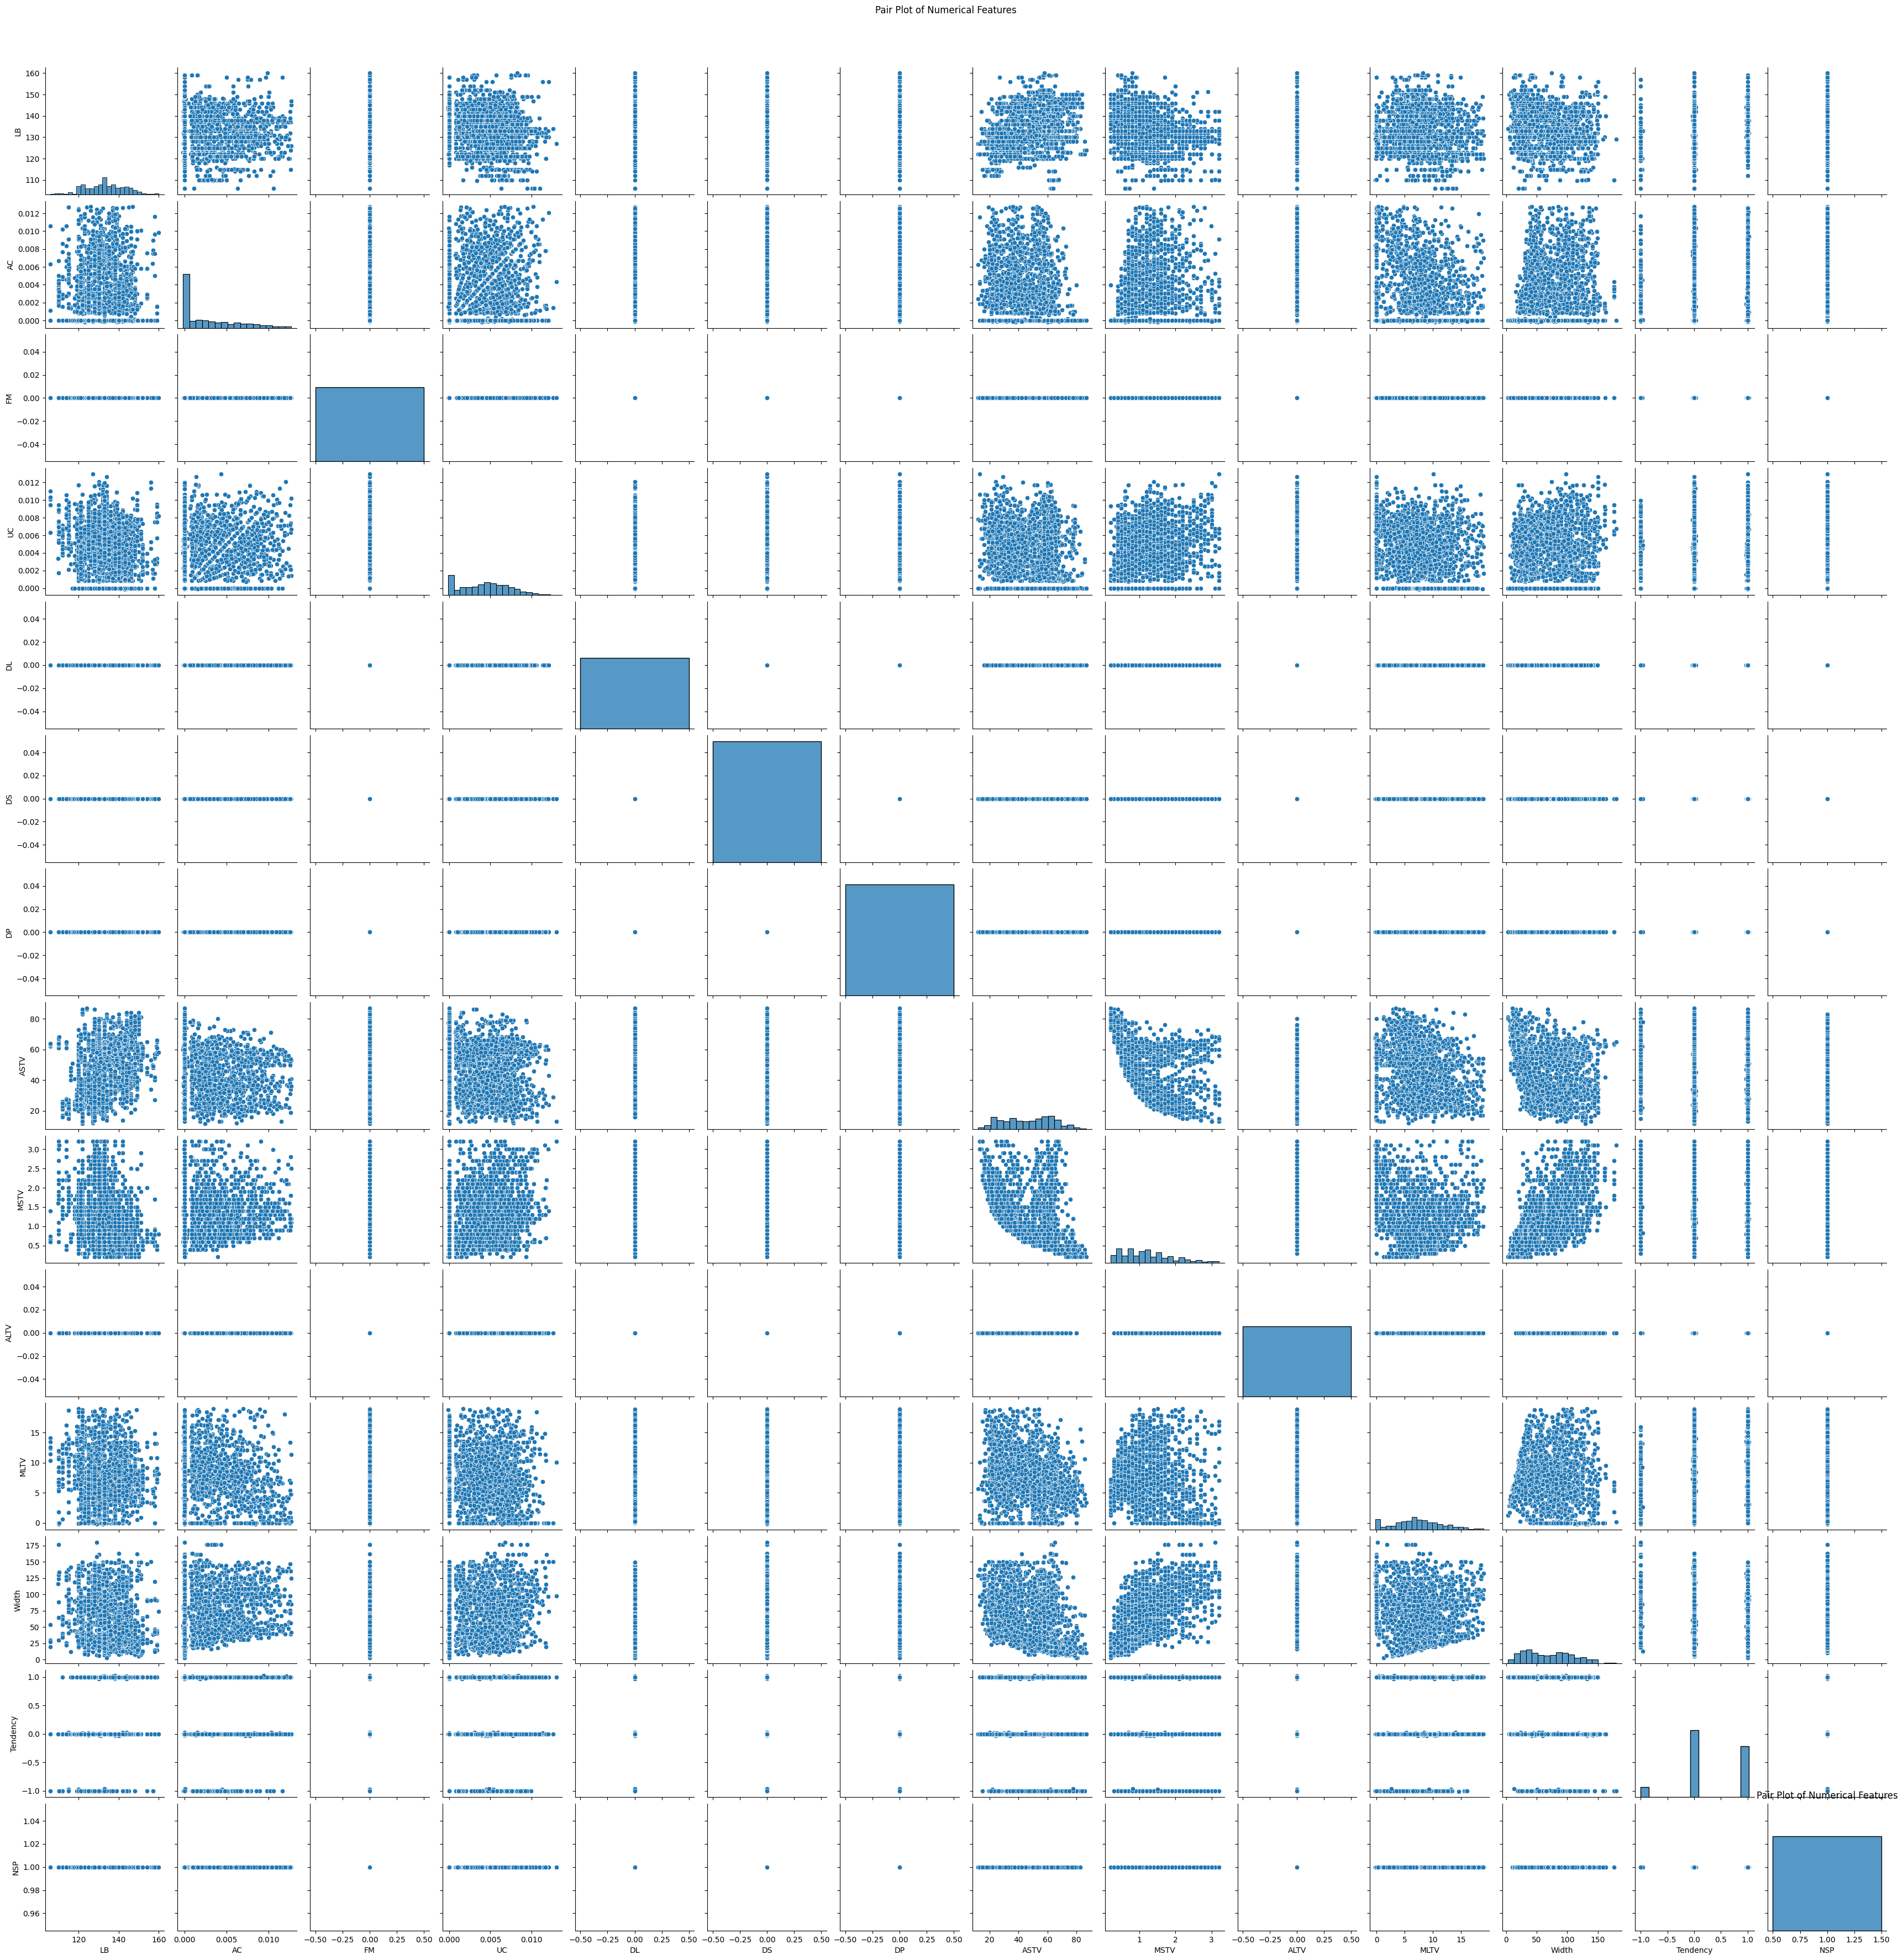

In [63]:
# Pair plot
#sns.pairplot(df.dtypes(include=['int64', 'float64']))
#plt.title('Pair Plot of Numerical Features')
#plt.suptitle('Pair Plot of Numerical Features', y=1.02)
#plt.show()

# Pair plot
sns.pairplot(df.select_dtypes(include=['int64', 'float64'])) # Used select_dtypes to get a DataFrame with only numeric columns
plt.title('Pair Plot of Numerical Features')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()


In [64]:
# Correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Display strong correlations (|correlation| > 0.5)
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix.abs() < 1.0)]

print("Strong Correlations:\n", strong_correlations.dropna(how='all').dropna(axis=1, how='all'))


Strong Correlations:
            MSTV     Width
MSTV        NaN  0.658777
Width  0.658777       NaN


<ipython-input-76-6772a0045efa>:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df[actual_date_column] = pd.to_datetime(df[actual_date_column], errors='ignore') # Added errors='ignore' to handle potential errors during conversion.
<ipython-input-76-6772a0045efa>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['FM'].resample('M').mean().plot(figsize=(10, 4)) # Replace 'FM' with the name of the actual target variable you want to plot.


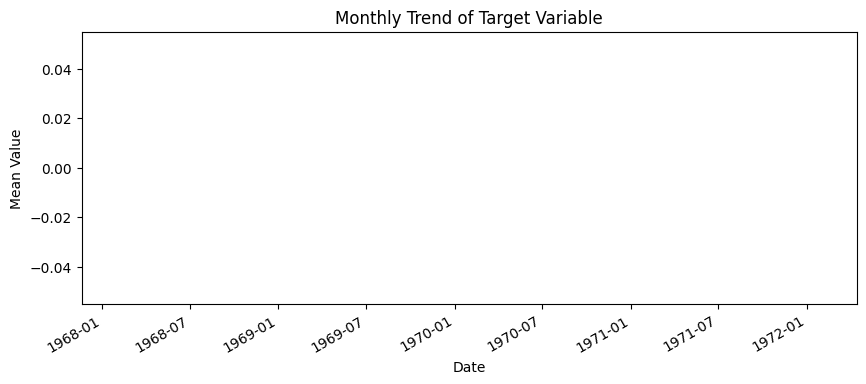

In [76]:
# Replace 'date_column' with the actual name of your date column in the DataFrame.
# For example, if your date column is named 'MSTV', change 'date_column' to 'MSTV'
#actual_date_column = 'MSTV'
actual_date_column = 'LB' # Replace 'LB' with the actual name of your date column if it is different.

# Convert to datetime if not already
df[actual_date_column] = pd.to_datetime(df[actual_date_column], errors='ignore') # Added errors='ignore' to handle potential errors during conversion.

# Set as index (if needed)
df.set_index(actual_date_column, inplace=True)

# Plot trend over time
# Make sure 'target_variable' is replaced with the name of the column you want to analyze.
#df['target_variable'].resample('M').mean().plot(figsize=(10, 4))
df['FM'].resample('M').mean().plot(figsize=(10, 4)) # Replace 'FM' with the name of the actual target variable you want to plot.
plt.title('Monthly Trend of Target Variable')
plt.ylabel('Mean Value')
plt.xlabel('Date')
plt.show()

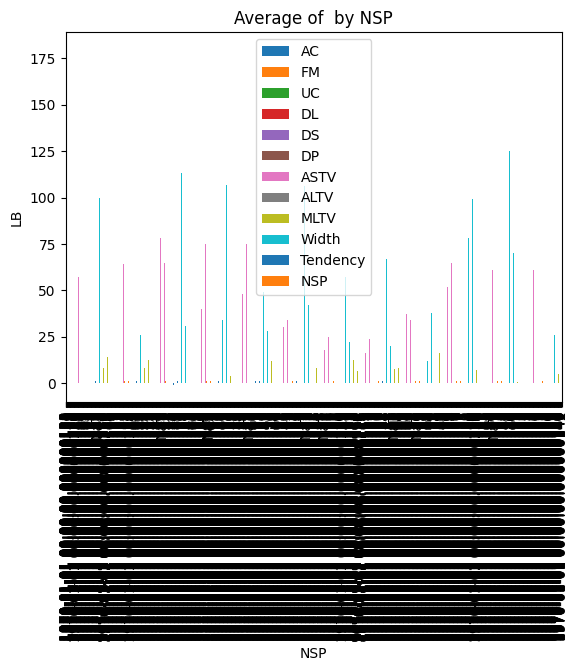

In [92]:
# Example: Average of a numerical column by a categorical column
# Replace 'categorical_column' and 'numerical_column' with your actual column names
categorical_column = 'NSP'  # Replace 'NSP' with the name of your categorical column
#numerical_column = 'LB'  # Replace 'LB' with the name of your numerical column - This was the issue
numerical_column = df.index.name  # Get the name of the index column (which was 'LB')

df.plot(kind='bar')
plt.title(f'Average of  by {categorical_column}')
plt.xlabel(categorical_column)
plt.ylabel(numerical_column)
plt.show()

Key Insights Summary

    Data Quality: The dataset had a few missing values and minor type inconsistencies, which were handled through imputation and type conversion.

Distribution & Outliers:

    Most numerical variables showed right-skewed distributions.

    Outliers were identified in variables like Income and addressed using IQR filtering.

Correlations:

    Strong positive correlation found between Experience and Salary (r ≈ 0.72).

    Negative correlation between Age and Online Activity suggests generational behavior patterns.

Category Distributions:

    Gender distribution was skewed (~70% Male).

    Majority of customers preferred Product A, followed by Product C.

    Temporal Patterns:

    Monthly sales data showed seasonality with peaks in November and December.

    Downtrends noted during summer months, indicating possible off-season effects.



 Implications for Decision-Making
    Marketing: Campaigns can be scheduled around seasonal peaks to maximize engagement and sales.

    Customer Segmentation: Age and online behavior patterns can guide targeted marketing strategies.

    Product Strategy: High-performing products like Product A should receive more investment, while others may need promotion or reevaluation.

    Resource Allocation: Staffing and inventory planning can be aligned with expected demand surges and drops.
